In [1]:
!pip install arxiv

In [2]:
import arxiv
import pandas as pd

In [3]:
keyphrases = ['deepfake', 'deepfake?', '"deep-fake"', '"deep fake"', '"voice cloning"', '"voice conversion"', 'fake AND voice', '"image synthesis"', '"image generation" AND "face"', '"video forgery"', '"fake video"']
#keyphrases = []



#?? "video editing"
#?? "image inpainting"


In [4]:
from ast import literal_eval
from tqdm.notebook import tqdm

def do_search(keyphrase):
    
    search = arxiv.Search(
      query = keyphrase,
      #id_list: List[str] = [],
      max_results = 10000,
      sort_by = arxiv.SortCriterion.SubmittedDate,
      #sort_by: SortCriterion = SortCriterion.Relevanvce,
      sort_order = arxiv.SortOrder.Descending)
    
    return search

def parse_search_to_df(search):
    
    results = []
  
    for raw_result in tqdm(search.results()):
        parsed_result = {}
        parsed_result["published"] = raw_result.published
        parsed_result["url"] = raw_result.entry_id
        parsed_result["title"] = raw_result.title
        parsed_result["primary_category"] = raw_result.primary_category
        parsed_result["categories"] = raw_result.categories
        parsed_result["abstract"] = raw_result.summary
        results.append(parsed_result)
    
    local_result_df = pd.DataFrame(results)
    if results:
        local_result_df["published"] = pd.to_datetime(local_result_df["published"])
        local_result_df.set_index("published", inplace=True)
        local_result_df["categories"] = local_result_df["categories"].astype(str)
    
    return local_result_df

def do_keyphrase_list(keyphrases):
    
    for keyphrase in tqdm(keyphrases):
        if "local_result_df" in locals():
            tmp_df = parse_search_to_df(do_search(keyphrase))
            local_result_df = pd.concat([local_result_df,tmp_df])#, ignore_index=True)
            local_result_df.drop_duplicates(inplace=True)
        else:
            local_result_df = parse_search_to_df(do_search(keyphrase))

    local_result_df["categories"] = local_result_df["categories"].apply(lambda x: literal_eval(str(x)))
    return local_result_df

result_df = do_keyphrase_list(keyphrases)
result_df




  0%|          | 0/11 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,url,title,primary_category,categories,abstract
published,,,,,
2022-09-12 17:17:49+00:00,http://arxiv.org/abs/2209.05419v1,Landmark Enhanced Multimodal Graph Learning fo...,cs.CV,[cs.CV],With the rapid development of face forgery tec...
2022-09-12 15:05:41+00:00,http://arxiv.org/abs/2209.05299v1,Deep Convolutional Pooling Transformer for Dee...,cs.CV,"[cs.CV, cs.AI]","Recently, Deepfake has drawn considerable publ..."
2022-09-05 01:08:05+00:00,http://arxiv.org/abs/2209.01714v1,On the Horizon: Interactive and Compositional ...,cs.AI,"[cs.AI, cs.LG, I.2.1; I.2.6; I.2.7; I.2.10; I....","Over a five-year period, computing methods for..."
2022-09-03 03:56:49+00:00,http://arxiv.org/abs/2209.01320v1,Synthesizing Photorealistic Virtual Humans Thr...,cs.CV,[cs.CV],"Over the last few decades, many aspects of hum..."
2022-09-01 05:30:23+00:00,http://arxiv.org/abs/2209.00233v2,Delving into the Frequency: Temporally Consist...,cs.CV,[cs.CV],Human motion transfer refers to synthesizing p...
...,...,...,...,...,...
2020-01-09 14:37:17+00:00,http://arxiv.org/abs/2001.03024v2,DeeperForensics-1.0: A Large-Scale Dataset for...,cs.CV,"[cs.CV, cs.LG]",We present our on-going effort of constructing...
2019-06-21 18:29:57+00:00,http://arxiv.org/abs/1906.09288v1,Hiding Faces in Plain Sight: Disrupting AI Fac...,cs.CV,[cs.CV],Recent years have seen fast development in syn...
2019-01-25 07:09:14+00:00,http://arxiv.org/abs/1901.08759v1,Misleading Metadata Detection on YouTube,cs.CL,"[cs.CL, cs.CV, eess.IV]",YouTube is the leading social media platform f...


In [5]:
print("Total number of papers",len(result_df))

Total number of papers 1620


<AxesSubplot:xlabel='published'>

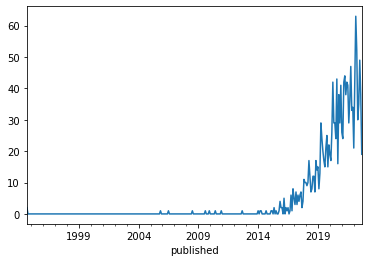

In [6]:
result_df["url"].resample("MS").count().plot()

<AxesSubplot:xlabel='published'>

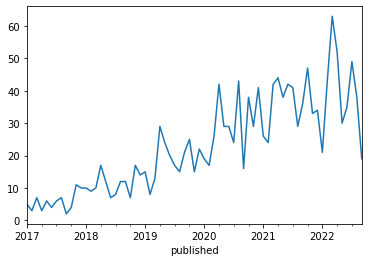

In [7]:
result_df[result_df.index.to_series().gt("2017")]["url"].resample("MS").count().plot()

In [8]:
len(result_df[result_df.index.to_series().gt("2017")]["url"].resample("MS"))

69

In [9]:
result_df.resample("MS").count().to_csv("arxiv_publications.csv")

In [10]:
#filter categories

In [11]:
result_df.primary_category.value_counts()

cs.CV                921
eess.AS              201
cs.SD                159
eess.IV               87
cs.LG                 78
cs.CR                 35
cs.CL                 23
cs.GR                 22
stat.ML               16
cs.CY                 11
cs.HC                  9
physics.med-ph         8
cs.MM                  7
astro-ph.IM            6
cs.SI                  4
cs.RO                  3
cs.NE                  3
cs.NI                  3
q-bio.NC               2
astro-ph               2
astro-ph.SR            2
astro-ph.GA            2
astro-ph.CO            2
cs.AI                  2
adap-org               2
cond-mat.mtrl-sci      1
cs.SE                  1
cs.IR                  1
stat.ME                1
q-bio.BM               1
math.ST                1
astro-ph.EP            1
physics.geo-ph         1
cs.ET                  1
physics.soc-ph         1
Name: primary_category, dtype: int64

In [12]:
for abst in result_df["abstract"]:
    print(abst,"\n\n")

With the rapid development of face forgery technology, deepfake videos have
attracted widespread attention in digital media. Perpetrators heavily utilize
these videos to spread disinformation and make misleading statements. Most
existing methods for deepfake detection mainly focus on texture features, which
are likely to be impacted by external fluctuations, such as illumination and
noise. Besides, detection methods based on facial landmarks are more robust
against external variables but lack sufficient detail. Thus, how to effectively
mine distinctive features in the spatial, temporal, and frequency domains and
fuse them with facial landmarks for forgery video detection is still an open
question. To this end, we propose a Landmark Enhanced Multimodal Graph Neural
Network (LEM-GNN) based on multiple modalities' information and geometric
features of facial landmarks. Specifically, at the frame level, we have
designed a fusion mechanism to mine a joint representation of the spatial and
f

In [13]:
for abst in result_df[result_df.primary_category=="eess.IV"]["abstract"]:
    print(abst,"\n\n")

An optical microscopic examination of thinly cut stained tissue on glass
slides prepared from a FFPE tissue blocks is the gold standard for tissue
diagnostics. In addition, the diagnostic abilities and expertise of any
pathologist is dependent on their direct experience with common as well as
rarer variant morphologies. Recently, deep learning approaches have been used
to successfully show a high level of accuracy for such tasks. However,
obtaining expert-level annotated images is an expensive and time-consuming task
and artificially synthesized histological images can prove greatly beneficial.
Here, we present an approach to not only generate histological images that
reproduce the diagnostic morphologic features of common disease but also
provide a user ability to generate new and rare morphologies. Our approach
involves developing a generative adversarial network model that synthesizes
pathology images constrained by class labels. We investigated the ability of
this framework in synt

In [14]:
#arima

- "deepfake"
- '"deep fake"'
- '"fake video"'
- '"video forgery"'
- '"image generation" "face"'

?? "video editing"
?? "image inpainting"

ARXIV time bias!!!!!


Arxiv: image synthesis kulcsszó CS-re szűrve jó lehet!

" használata harmadolja a találatokat


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=image+synthesis&terms-0-field=all&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=all_dates&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first



#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

publish_df = pd.to_datetime(publish_dates).to_frame().resample("MS").count()

#publish_df = publish_df[publish_df.index.year >= 2016]


model = auto_arima(publish_df, start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=10):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

STEPS = 60

pred_df = forecast_to_df(model, steps=STEPS)

print(model)
print(publish_df.index[-1])

pred_df.set_index(pd.date_range(start=publish_df.index[-1],periods=STEPS, freq="MS"), inplace=True)
fig, ax = plt.subplots(figsize=(22,7))
ax.plot(publish_df[publish_df.index.year >= 2016],label='Monthly publication frequencies')
ax.plot(pred_df, label=['Lower dound',"Upper bound",'Projection mean'])
ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
ax.legend()
plt.plot()